In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/playground-series-s3e11/train.csv')

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/playground-series-s3e11/test.csv')

In [ ]:
test2=pd.read_csv('/content/drive/MyDrive/playground-series-s3e11/test.csv')

In [ ]:
ID=test2['id']

In [ ]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [ ]:
train.shape

(360336, 17)

Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, and XGBoost Regression,

## EDA

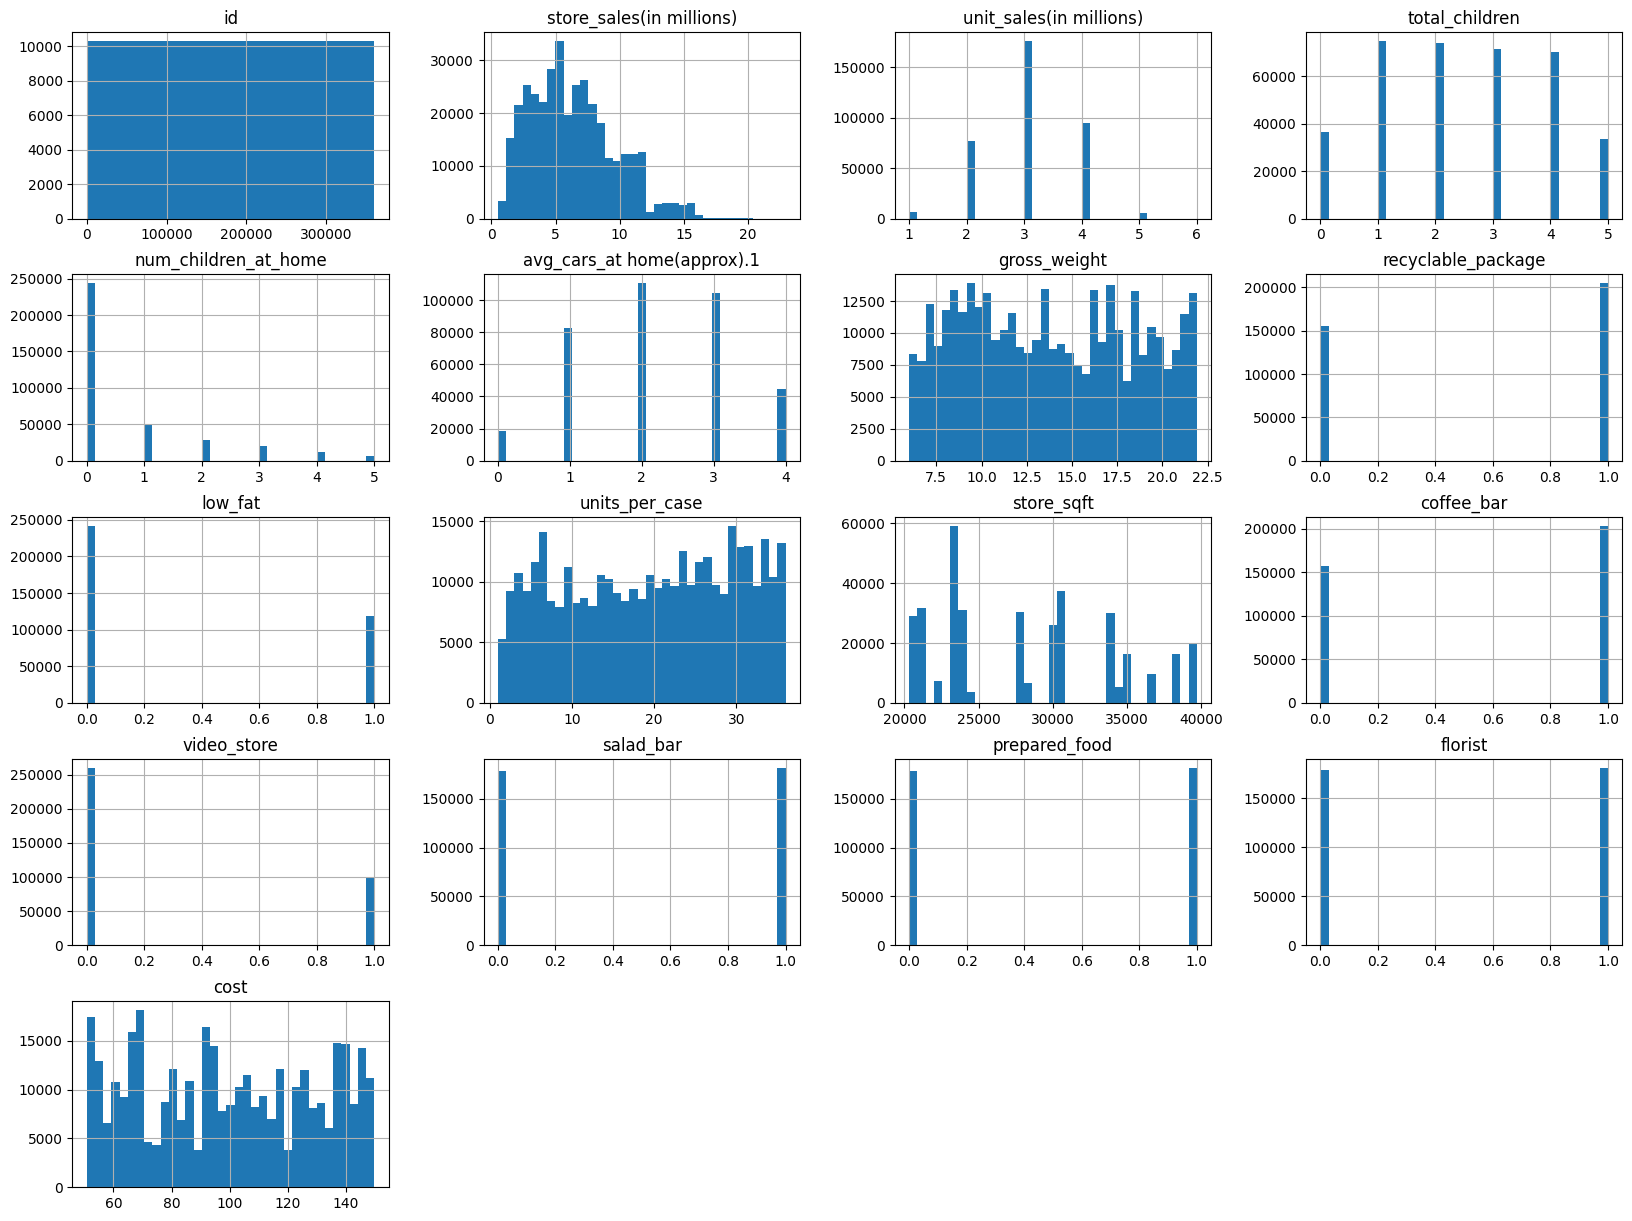

In [ ]:
%matplotlib inline
train.hist(bins=35,figsize = (20,15))
plt.show()

Calculating the Pearson Coorelation Coefficient
> It is the standarized measure of covariance, it is calculates by dividing the covariance by the product of the standard deviations of the two variables.

Formula: ![image.png](attachment:57ee3b49-1660-4d1b-b09f-27f3c2164522.png)
<br> We will be calculating this using the `corr()` function

In [ ]:
corr_matrix = train.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64

### Masking the upper triangle in heatmap
What does exactly masking means? In a heatmap, a mask is a boolean array that is used to hide or mask certain cells in the plot.
The cells in the data that correspond to `True` values in the mask will be hidden in the plot.
The cells in the data that correspond to `False` values in the mask will be shown in the plot.
`np.triu()` is used to create a boolean upper triangle matrix with `True` values in the upper triangle and `False` values in the lower triangle.



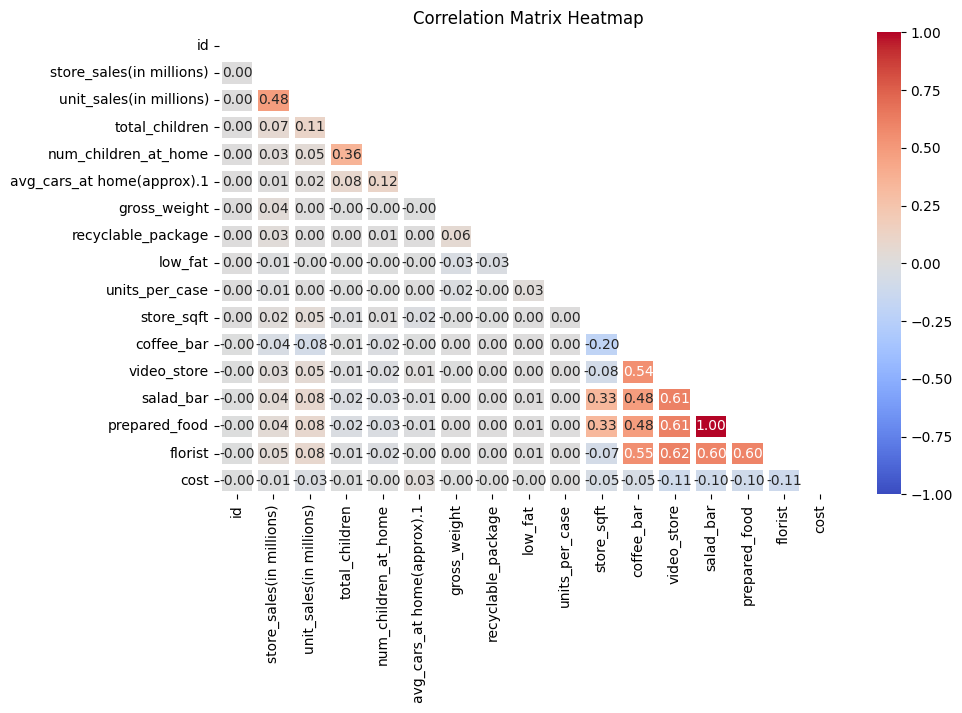

In [ ]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True,mask = mask, vmin=-1,vmax=1,fmt=".2f", linewidths=4 )
plt.title('Correlation Matrix Heatmap')
plt.show()


#Preprocessing


* Cost is not strongly correlated to any feature
* Perfect correlation between salad_bar and prepared_food. We can drop one of them

In [ ]:
most_important_features = ['total_children', 'num_children_at_home',
                           'avg_cars_at home(approx).1', 'store_sqft',
                           'coffee_bar', 'video_store', 'salad',
                           'florist']

def preprocess(df):
    df = df.copy()
    df['store_sqft'] = df['store_sqft'].astype('category')
    df['salad'] = (df['salad_bar'] + df['prepared_food']) / 2
    df['log_cost'] = np.log1p(df['cost'])
    return df

In [ ]:
train=preprocess(train)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(train[most_important_features], train["log_cost"], test_size=0.2, random_state=200)

In [ ]:
train[most_important_features].head()

,total_children,num_children_at_home,avg_cars_at home(approx).1,store_sqft,coffee_bar,video_store,salad,florist
0,2.0,2.0,2.0,36509.0,0.0,0.0,0.0,0.0
1,4.0,0.0,3.0,28206.0,1.0,0.0,0.0,0.0
2,0.0,0.0,3.0,21215.0,1.0,0.0,0.0,0.0
3,5.0,0.0,0.0,21215.0,1.0,0.0,0.0,0.0
4,5.0,0.0,3.0,27694.0,1.0,1.0,1.0,1.0


In [ ]:
def preprocess_test(df):
    df = df.copy()
    df['store_sqft'] = df['store_sqft'].astype('category')
    df['salad'] = (df['salad_bar'] + df['prepared_food']) / 2
    return df

In [ ]:
test=preprocess_test(test)[most_important_features]

In [ ]:
test.head()

,total_children,num_children_at_home,avg_cars_at home(approx).1,store_sqft,coffee_bar,video_store,salad,florist
0,1.0,0.0,2.0,20319.0,0.0,0.0,0.0,0.0
1,2.0,2.0,3.0,33858.0,1.0,0.0,1.0,1.0
2,0.0,0.0,3.0,39696.0,0.0,0.0,1.0,0.0
3,3.0,3.0,2.0,23688.0,1.0,1.0,1.0,1.0
4,2.0,0.0,2.0,27694.0,1.0,1.0,1.0,1.0


## 1. Linear Regression
Linear regression is a statistical technique that is used to model the relationship between a dependent variable (often denoted as Y) and one or more independent variables (often denoted as X). It assumes that there is a linear relationship between the dependent variable and each of the independent variables. <br>
Y = β0 + β1 * X + ε <br>
where Y is the dependent variable, X is the independent variable, β0 and β1 are the coefficients (also known as the intercept and the slope, respectively), and ε is the error term.

It can be implemented using sklearn LinearRegression function
`lr = LinearRegression()`
`lr.fit(X_train, y_train)`

In [ ]:
sel_features = [
    'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist',
]
selected_features_test = [
    'id',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist',
]

In [ ]:
from sklearn.linear_model import LinearRegression
param_grid = {
    'fit_intercept': [True, False],  # Whether to fit an intercept term
    'n_jobs': [-1]# Whether to normalize the features
}
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
y_pred = best_model.predict(X_test)

{'fit_intercept': True, 'n_jobs': -1}


In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error,mean_absolute_error
print("MAE score: %.3f" % mean_absolute_error(y_test, y_pred))
print("MSE score: %.3f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.3f " % r2_score(y_test,y_pred))
print("RMSE score: %.3f " %  mean_squared_error(y_test,y_pred,squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(y_test,y_pred,squared=False))

MAE score: 0.270
MSE score: 0.099
R2 score: 0.020 
RMSE score: 0.314 
RMSLE Score: 0.057 


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test),np.expm1(y_pred)))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))
print("R2 score: %.3f " % r2_score(np.expm1(y_test),np.expm1(y_pred)))
print("RMSE score: %.3f " %  mean_squared_error(np.expm1(y_test),np.expm1(y_pred),squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred),squared=False))

MAE score: 25.917
MSE score: 904.025
R2 score: -0.006 
RMSE score: 30.067 
RMSLE Score: 0.314 


In [ ]:
columns=['Model','MAE','MSE','R2_score','RMSE','RMSLE']
dt=pd.DataFrame(columns=columns)
print(dt)
scoredata={
  'Model':model,
  'MAE':mean_absolute_error(np.expm1(y_test),np.expm1(y_pred)),
  'MSE':mean_squared_error(np.expm1(y_test),np.expm1(y_pred)),
  'R2_score': r2_score(np.expm1(y_test),np.expm1(y_pred)),
  'RMSE': mean_squared_error(np.expm1(y_test),np.expm1(y_pred),squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred),squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

Empty DataFrame
Columns: [Model, MAE, MSE, R2_score, RMSE, RMSLE]
Index: []


<ipython-input-25-69f56c04ac0b>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.06701,0.313887


It is not giving good results.
Let's try other regression techniques

## Lasso Regression
* Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression technique that uses L1 regularization to introduce a penalty term to the cost function. The penalty term is the absolute value of the sum of the model's coefficients, multiplied by a hyperparameter alpha.
<br>
* Lasso regression tends to produce sparse solutions, where only a subset of the features are used in the final model. This can make the model more interpretable and easier to understand.

In [ ]:
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred2 = lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
print("MAE score: %.3f" % mean_absolute_error(y_test, y_pred))
print("MSE score: %.3f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.3f " % r2_score(y_test,y_pred))
print("RMSE score: %.3f " %  mean_squared_error(y_test,y_pred,squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(y_test,y_pred,squared=False))

MAE score: 0.270
MSE score: 0.099
R2 score: 0.020 
RMSE score: 0.314 
RMSLE Score: 0.057 


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test),np.expm1(y_pred)))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))
print("R2 score: %.3f " % r2_score(np.expm1(y_test),np.expm1(y_pred)))
print("RMSE score: %.3f " %  mean_squared_error(np.expm1(y_test),np.expm1(y_pred),squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred),squared=False))

MAE score: 25.917
MSE score: 904.025
R2 score: -0.006 
RMSE score: 30.067 
RMSLE Score: 0.314 


In [ ]:
scoredata={
  'Model':lasso,
  'MAE':mean_absolute_error(np.expm1(y_test),np.expm1(y_pred2)),
  'MSE':mean_squared_error(np.expm1(y_test),np.expm1(y_pred2)),
  'R2_score': r2_score(np.expm1(y_test),np.expm1(y_pred2)),
  'RMSE': mean_squared_error(np.expm1(y_test),np.expm1(y_pred2),squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred2),squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-32-49d5e619a376>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719


We got the same results with the Lasso regression as well. It may happen because  features in the dataset are not highly correlated and there is no overfitting in the linear regression model.

## ElasticNet
ElasticNet Regression is a linear regression model. The model uses a combination of the Lasso and Ridge regression penalties to overcome their individual limitations. The ElasticNet regression can handle high-dimensional datasets and select the most important features while also preventing overfitting.


In [ ]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet(alpha=1.0,l1_ratio=0.5)
en_model.fit(X_train,y_train)

ElasticNet()

In [ ]:
y_pred3 = en_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
print("MAE score: %.3f" % mean_absolute_error(y_test, y_pred3))
print("MSE score: %.3f" % mean_squared_error(y_test, y_pred3))
print("R2 score: %.3f " % r2_score(y_test,y_pred3))
print("RMSE score: %.3f " %  mean_squared_error(y_test,y_pred3,squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(y_test,y_pred3,squared=False))

MAE score: 0.272
MSE score: 0.100
R2 score: 0.002 
RMSE score: 0.317 
RMSLE Score: 0.058 


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test),np.expm1(y_pred3)))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test),np.expm1(y_pred3)))
print("R2 score: %.3f " % r2_score(np.expm1(y_test),np.expm1(y_pred3)))
print("RMSE score: %.3f " %  mean_squared_error(np.expm1(y_test),np.expm1(y_pred3),squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred3),squared=False))

MAE score: 26.126
MSE score: 918.891
R2 score: -0.022 
RMSE score: 30.313 
RMSLE Score: 0.317 


In [ ]:
scoredata={
  'Model':en_model,
  'MAE':mean_absolute_error(np.expm1(y_test),np.expm1(y_pred3)),
  'MSE':mean_squared_error(np.expm1(y_test),np.expm1(y_pred3)),
  'R2_score': r2_score(np.expm1(y_test),np.expm1(y_pred3)),
  'RMSE': mean_squared_error(np.expm1(y_test),np.expm1(y_pred3),squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred3),squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-38-7ad2cd688ab8>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
3,ElasticNet(),26.126222,918.891339,-0.022310,30.313221,0.316719


Again it is giving the same result :/


## Decisin Tree Regression
It is a type of regression algorithm that works by partitioning the data into smaller and smaller subsets based on the value of a selected feature or predictor variable.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5, min_samples_leaf=8)
regressor.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

In [ ]:
y_pred4 = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
print("MAE score: %.3f" % mean_absolute_error(y_test, y_pred4))
print("MSE score: %.3f" % mean_squared_error(y_test, y_pred4))
print("R2 score: %.3f " % r2_score(y_test,y_pred4))
print("RMSE score: %.3f " %  mean_squared_error(y_test,y_pred4,squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(y_test,y_pred4,squared=False))

MAE score: 0.262
MSE score: 0.094
R2 score: 0.066 
RMSE score: 0.306 
RMSLE Score: 0.056 


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test),np.expm1(y_pred4)))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test),np.expm1(y_pred4)))
print("R2 score: %.3f " % r2_score(np.expm1(y_test),np.expm1(y_pred4)))
print("RMSE score: %.3f " %  mean_squared_error(np.expm1(y_test),np.expm1(y_pred4),squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred4),squared=False))

MAE score: 25.192
MSE score: 863.779
R2 score: 0.039 
RMSE score: 29.390 
RMSLE Score: 0.306 


In [ ]:
scoredata={
  'Model':regressor,
  'MAE':mean_absolute_error(np.expm1(y_test),np.expm1(y_pred4)),
  'MSE':mean_squared_error(np.expm1(y_test),np.expm1(y_pred4)),
  'R2_score': r2_score(np.expm1(y_test),np.expm1(y_pred4)),
  'RMSE': mean_squared_error(np.expm1(y_test),np.expm1(y_pred4),squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred4),squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-44-85efc5bb77be>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


It gave little Better Results than Before, Let's see other models also

## Random Forest Regression
Random Forest regression is an ensemble learning method that combines multiple decision trees to make predictions <br>
The main advantage of Random Forest regression is that it can handle complex relationships between features and the target variable, and can avoid overfitting by using multiple decision trees. It also has the ability to measure the importance of each feature in the prediction. <br>


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True], 'max_depth': [20,30,40, None], 'max_features': ['auto', 'log2'], 'n_estimators': [300,400,500,600]}
rfr = RandomForestRegressor(random_state=101)

In [ ]:
grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 1, return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [300, 400, 500, 600]},
             return_train_score=True, verbose=1)

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 400}

In [ ]:
y_pred_rfr = grid.predict(X_test)

In [ ]:
y_pred_2=pd.DataFrame(np.expm1(y_pred_rfr))

In [ ]:
y_pred_2

,0
0,86.004011
1,96.741133
2,104.965539
3,91.729322
4,100.448648
...,...
72063,77.955135
72064,91.253195
72065,96.584858
72066,92.279874


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('R2:', np.sqrt(metrics.r2_score(y_test, y_pred_rfr)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print("RMSLE", mean_squared_log_error(y_test, y_pred_rfr, squared = False))

Mean Absolute Error: 0.2445555151645705
Mean Squared Error: 0.08608603824095402
R2: 0.37899779672442446
Root Mean Squared Error: 0.29340422328411364
RMSLE 0.05337547560516488


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test),np.expm1(y_pred_rfr)))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfr)))
print("R2 score: %.3f " % r2_score(np.expm1(y_test),np.expm1(y_pred_rfr)))
print("RMSE score: %.3f " %  mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfr),squared=False))
print("RMSLE Score: %.3f " % mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred_rfr),squared=False))

MAE score: 23.469
MSE score: 790.624
R2 score: 0.120 
RMSE score: 28.118 
RMSLE Score: 0.293 


In [ ]:
grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 300, 400, 500]},
             return_train_score=True, verbose=1)

In [ ]:
scoredata={
  'Model':rfr,
  'MAE':mean_absolute_error(np.expm1(y_test),np.expm1(y_pred_rfr)),
  'MSE':mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfr)),
  'R2_score': r2_score(np.expm1(y_test),np.expm1(y_pred_rfr)),
  'RMSE': mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfr),squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred_rfr),squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-55-e0af763037d3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
3,ElasticNet(),26.126222,918.891339,-0.022310,30.313221,0.316719
4,"DecisionTreeRegressor(max_depth=5, min_samples...",25.192070,863.779024,0.039005,29.390118,0.306360
5,RandomForestRegressor(random_state=101),23.468876,790.624204,0.120393,28.118041,0.293404


The RMSLE value is becoming better and better. Nice 🎊

## Gradient Boosting
It is a machine learning technique that combines multiple weak regression models to create a strong model. It is a type of boosting algorithm that builds an ensemble of decision trees by iteratively improving upon the previous model's errors. The algorithm uses gradient descent to optimize the objective function, which is typically a loss function that measures the error between the predicted and actual values. Gradient boosting regression can be used for both regression and classification problems and has shown to be particularly effective in solving complex, non-linear problems.

applying `logarithm of (1 + input array)` element-wise on y_train. It is a way of transforming a positive-valued skewed distribution into a more normal distribution, as it tends to compress larger values and expand smaller ones.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth =2, n_estimators=5,warm_start=True)
gbrt.fit(X_train,y_train)
min_val_error = float("inf")
error_going_up = 0
# Let's gradually increase the number of estimators and check which model is best: perform early stopping with patience of 3
for n_estimators in range(10, 100, 10):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = np.expm1(gbrt.predict(X_test))
    val_error = mean_squared_log_error(y_test, y_pred)**0.5
    print("With "+str(n_estimators)+" estimators, val error = "+str(val_error))
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up=0
    else:
        error_going_up +=1
        if error_going_up==3:
            break # early stopping

With 10 estimators, val error = 2.8496532770002436
With 20 estimators, val error = 2.8496188700344827
With 30 estimators, val error = 2.8496073086307905
With 40 estimators, val error = 2.8496319555172804
With 50 estimators, val error = 2.8496239889178194
With 60 estimators, val error = 2.849618990469183


In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

# Assuming you have already trained and made predictions with the gbrt model

# Make predictions on the test set
y_pred_gbrt = np.expm1(gbrt.predict(X_test))

# Calculate and print the error metrics
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test), y_pred_gbrt))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test), y_pred_gbrt))
print("R2 score: %.3f" % r2_score(np.expm1(y_test), y_pred_gbrt))
print("RMSE score: %.3f" % mean_squared_error(np.expm1(y_test), y_pred_gbrt, squared=False))
print("RMSLE Score: %.3f" % mean_squared_log_error(np.expm1(y_test), y_pred_gbrt, squared=False))


MAE score: 25.476
MSE score: 872.171
R2 score: 0.030
RMSE score: 29.533
RMSLE Score: 0.308


In [ ]:
dt = dt.drop(dt.index[-1])

In [ ]:
scoredata={
  'Model':gbrt,
  'MAE':mean_absolute_error(np.expm1(y_test),y_pred_gbrt),
  'MSE':mean_squared_error(np.expm1(y_test),y_pred_gbrt),
  'R2_score': r2_score(np.expm1(y_test),y_pred_gbrt),
  'RMSE': mean_squared_error(np.expm1(y_test),y_pred_gbrt,squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),y_pred_gbrt,squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-59-abfd4aac9510>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
3,ElasticNet(),26.126222,918.891339,-0.022310,30.313221,0.316719
4,"DecisionTreeRegressor(max_depth=5, min_samples...",25.192070,863.779024,0.039005,29.390118,0.306360
5,RandomForestRegressor(random_state=101),23.468876,790.624204,0.120393,28.118041,0.293404
6,([DecisionTreeRegressor(criterion='friedman_ms...,25.475778,872.171403,0.029668,29.532548,0.307887


In [ ]:
dt.to_csv('comparison.csv')

Not that good 👎

## XGBoost
XGBoost is an advanced version of the gradient boosting algorithm and uses a technique called “boosting” to create an ensemble of decision trees.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import optuna
import pandas as pd

# Assuming you have already loaded your data (X_train, X_test, y_train, y_test) and defined categorical_features
categorical_features=['store_sqft']
# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_val_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Create DMatrix objects for training and validation data
DM_0 = xgb.DMatrix(data=X_train_encoded, label=y_train)
DM_1 = xgb.DMatrix(data=X_val_encoded, label=y_test)

glob_params = {
    'tree_method': 'gpu_hist',
    'objective': 'reg:squaredlogerror',
    'eval_metric': 'rmsle',
    'n_estimators': 9999
}

# Define the objective function for optimization
def objective(trial):
    params = {
        'verbosity': 0,
        'learning_rate': trial.suggest_float('learning_rate', 1e-10, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 1),
        'booster': trial.suggest_categorical("booster", ["dart", "gbtree", 'gblinear']),
        'sampling_method': trial.suggest_categorical('sampling_method', ['uniform', 'gradient_based']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'reg_alpha': trial.suggest_float("reg_alpha", 0, 1),
        'reg_lambda': trial.suggest_float("reg_lambda", 0, 1),
    }
    params.update(glob_params)

    # Train the model with the current set of parameters
    xgbr = xgb.train(
        params,
        dtrain=DM_0,
        num_boost_round=100,
        evals=[(DM_1, 'valid')],
        early_stopping_rounds=20,
        verbose_eval=False
    )

    # Return the evaluation metric for optimization (you can change this to other metrics)
    eval_metric = xgbr.best_score
    return eval_metric

# Create an Optuna study for optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
xgbr = xgb.train(
    params=best_params,
    dtrain=DM_0,
    num_boost_round=2000,
    early_stopping_rounds=20,
    evals=[(DM_0, 'train'), (DM_1, 'eval')],
    verbose_eval=True
)

# Now, you have the final model with optimized hyperparameters


[I 2023-10-07 06:25:05,160] A new study created in memory with name: no-name-8575636f-2658-4ff5-ab51-a73e98a342d5
[I 2023-10-07 06:25:07,277] Trial 0 finished with value: 0.05428801610291186 and parameters: {'learning_rate': 0.13064698294127128, 'max_depth': 8, 'min_child_weight': 1, 'booster': 'gbtree', 'sampling_method': 'uniform', 'grow_policy': 'lossguide', 'reg_alpha': 0.6490799978288251, 'reg_lambda': 0.5098460485143957}. Best is trial 0 with value: 0.05428801610291186.
[I 2023-10-07 06:25:18,331] Trial 1 finished with value: 0.05767819840721815 and parameters: {'learning_rate': 0.2043550721613038, 'max_depth': 12, 'min_child_weight': 0, 'booster': 'gblinear', 'sampling_method': 'gradient_based', 'grow_policy': 'depthwise', 'reg_alpha': 0.3690203944864412, 'reg_lambda': 0.9051714241199754}. Best is trial 0 with value: 0.05428801610291186.
[I 2023-10-07 06:25:21,386] Trial 2 finished with value: 0.05767819836767624 and parameters: {'learning_rate': 0.4451165291100229, 'max_depth':

Best Hyperparameters: {'learning_rate': 0.5791422705820309, 'max_depth': 12, 'min_child_weight': 0, 'booster': 'gbtree', 'sampling_method': 'gradient_based', 'grow_policy': 'depthwise', 'reg_alpha': 0.0003340218609234749, 'reg_lambda': 0.7542092937377941}


XGBoostError: ignored

In [ ]:
xgbr = xgb.train(
    params={'learning_rate': 0.5791422705820309, 'max_depth': 12, 'min_child_weight': 0, 'booster': 'gbtree', 'grow_policy': 'depthwise', 'reg_alpha': 0.0003340218609234749, 'reg_lambda': 0.7542092937377941},
    dtrain=DM_0,
    num_boost_round=2000,
    early_stopping_rounds=20,
    evals=[(DM_0, 'train'), (DM_1, 'eval')],
    verbose_eval=True
)


[0]	train-rmse:0.30366	eval-rmse:0.30427
[1]	train-rmse:0.30062	eval-rmse:0.30135
[2]	train-rmse:0.29901	eval-rmse:0.29989
[3]	train-rmse:0.29677	eval-rmse:0.29788
[4]	train-rmse:0.29400	eval-rmse:0.29547
[5]	train-rmse:0.29346	eval-rmse:0.29498
[6]	train-rmse:0.29265	eval-rmse:0.29426
[7]	train-rmse:0.29219	eval-rmse:0.29392
[8]	train-rmse:0.29195	eval-rmse:0.29380
[9]	train-rmse:0.29180	eval-rmse:0.29369
[10]	train-rmse:0.29164	eval-rmse:0.29359
[11]	train-rmse:0.29144	eval-rmse:0.29346
[12]	train-rmse:0.29135	eval-rmse:0.29342
[13]	train-rmse:0.29132	eval-rmse:0.29341
[14]	train-rmse:0.29128	eval-rmse:0.29340
[15]	train-rmse:0.29125	eval-rmse:0.29341
[16]	train-rmse:0.29124	eval-rmse:0.29342
[17]	train-rmse:0.29123	eval-rmse:0.29342
[18]	train-rmse:0.29122	eval-rmse:0.29343
[19]	train-rmse:0.29121	eval-rmse:0.29343
[20]	train-rmse:0.29121	eval-rmse:0.29343
[21]	train-rmse:0.29120	eval-rmse:0.29344
[22]	train-rmse:0.29120	eval-rmse:0.29344
[23]	train-rmse:0.29120	eval-rmse:0.29346
[2

{'learning_rate': 0.5791422705820309, 'max_depth': 12, 'min_child_weight': 0, 'booster': 'gbtree', 'sampling_method': 'gradient_based', 'grow_policy': 'depthwise', 'reg_alpha': 0.0003340218609234749, 'reg_lambda': 0.7542092937377941}

In [ ]:
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Create a DMatrix object for the test data
DM_test = xgb.DMatrix(data=X_test_encoded)
prediction = xgbr.predict(DM_test)
y_pred_xg=np.expm1(prediction)


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('R2:', np.sqrt(metrics.r2_score(y_test, prediction)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("RMSLE", mean_squared_log_error(y_test, prediction, squared = False))

Mean Absolute Error: 0.24460066349136017
Mean Squared Error: 0.08614509724760425
R2: 0.37822192806127797
Root Mean Squared Error: 0.29350485046691177
RMSLE 0.053393152812353406


In [ ]:
print("MAE score: %.3f" % mean_absolute_error(np.expm1(y_test), y_pred_xg))
print("MSE score: %.3f" % mean_squared_error(np.expm1(y_test), y_pred_xg))
print("R2 score: %.3f" % r2_score(np.expm1(y_test), y_pred_xg))
print("RMSE score: %.3f" % mean_squared_error(np.expm1(y_test), y_pred_xg, squared=False))
print("RMSLE Score: %.3f" % mean_squared_log_error(np.expm1(y_test), y_pred_xg, squared=False))

MAE score: 23.473
MSE score: 791.283
R2 score: 0.120
RMSE score: 28.130
RMSLE Score: 0.294


In [ ]:
dt=pd.read_csv('comparison.csv')

In [ ]:
scoredata={
  'Model':xgbr,
  'MAE':mean_absolute_error(np.expm1(y_test),y_pred_xg),
  'MSE':mean_squared_error(np.expm1(y_test),y_pred_xg),
  'R2_score': r2_score(np.expm1(y_test),y_pred_xg),
  'RMSE': mean_squared_error(np.expm1(y_test),y_pred_xg,squared=False),
  'RMSLE': mean_squared_log_error(np.expm1(y_test),y_pred_xg,squared=False)
}
dt=dt.append(scoredata,ignore_index=True)

<ipython-input-28-738507dc5f26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(scoredata,ignore_index=True)


In [ ]:
dt

,Unnamed: 0,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,0.0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,1.0,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,2.0,ElasticNet(),26.126222,918.891338,-0.022310,30.313221,0.316719
3,3.0,"DecisionTreeRegressor(max_depth=5, min_samples...",25.192070,863.779024,0.039005,29.390118,0.306360
4,4.0,RandomForestRegressor(random_state=101),23.468876,790.624204,0.120393,28.118041,0.293404
5,5.0,"GradientBoostingRegressor(max_depth=2, n_estim...",25.475778,872.171403,0.029668,29.532548,0.307887
6,NaN,<xgboost.core.Booster object at 0x796b47c171f0>,23.473404,791.283134,0.119660,28.129755,0.293505


In [ ]:
dt.columns

Index(['Unnamed: 0', 'Model', 'MAE', 'MSE', 'R2_score', 'RMSE', 'RMSLE'], dtype='object')

In [ ]:
dt=dt.drop('Unnamed: 0', axis=1)

In [ ]:
dt

,Model,MAE,MSE,R2_score,RMSE,RMSLE
0,LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
1,Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
2,ElasticNet(),26.126222,918.891338,-0.022310,30.313221,0.316719
3,"DecisionTreeRegressor(max_depth=5, min_samples...",25.192070,863.779024,0.039005,29.390118,0.306360
4,RandomForestRegressor(random_state=101),23.468876,790.624204,0.120393,28.118041,0.293404
5,"GradientBoostingRegressor(max_depth=2, n_estim...",25.475778,872.171403,0.029668,29.532548,0.307887
6,<xgboost.core.Booster object at 0x796b47c171f0>,23.473404,791.283134,0.119660,28.129755,0.293505


In [ ]:
from IPython.display import HTML

html_table = dt.to_html(classes='table table-bordered table-striped', index=False)

# Display the HTML table in the Jupyter Notebook
display(HTML(html_table))

Model,MAE,MSE,R2_score,RMSE,RMSLE
LinearRegression(),25.916629,904.025068,-0.005771,30.067010,0.313887
Lasso(alpha=0.1),26.126134,918.888597,-0.022307,30.313175,0.316719
ElasticNet(),26.126222,918.891338,-0.022310,30.313221,0.316719
"DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)",25.192070,863.779024,0.039005,29.390118,0.306360
RandomForestRegressor(random_state=101),23.468876,790.624204,0.120393,28.118041,0.293404
"GradientBoostingRegressor(max_depth=2, n_estimators=60, warm_start=True)",25.475778,872.171403,0.029668,29.532548,0.307887
<xgboost.core.Booster object at 0x796b47c171f0>,23.473404,791.283134,0.119660,28.129755,0.293505


In [ ]:
with open('interactive_table.html', 'w') as f:
    f.write(html_table)

# Display the file path
print("Interactive table saved as 'interactive_table.html'")

Interactive table saved as 'interactive_table.html'


In [ ]:
dt.to_csv('comparison2.csv')

In [ ]:
X_test_encoded = pd.get_dummies(test, columns=categorical_features)

# Create a DMatrix object for the test data
DM_test = xgb.DMatrix(data=X_test_encoded)
prediction = xgbr.predict(DM_test)
y_pred_xg=np.expm1(prediction)
pred_df = pd.DataFrame(y_pred_xg, columns=['cost'])
submission_df = pd.concat([ID, pred_df],axis=1)
submission_df.to_csv('submission17.csv', index=False)

In [ ]:

submission_df = pd.concat([ID, pred_df],axis=1)
submission_df.to_csv('submission14.csv', index=False)

In [ ]:
submission_df.head()

This is the Best results we got so far.

In [ ]:
X_test = np.array(test[sel_features].values)

In [ ]:
X_test

In [ ]:

DM_test=xgb.DMatrix(X_test)
submission_df = test['id']
prediction = xgbr.predict(DM_test)
pred_df = pd.DataFrame(prediction, columns=['cost'])
submission_df = pd.concat([test['id'], pred_df],axis=1)
submission_df.to_csv('submission3.csv', index=False)

In [ ]:
submission_df.isnull().sum()

#**CatBoost**


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor,Pool

In [ ]:
# Define the CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, verbose=0, task_type='GPU')  # Specify 'task_type' as 'GPU'

# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8],                   # Depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],   # Learning rate
    'l2_leaf_reg': [1, 3, 5],            # L2 regularization term
}


In [ ]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the GridSearchCV object to the train data
grid_search.fit(X_train, y_train)
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print('Best model:', best_model)
print('Best parameters:', best_params)


In [ ]:
y_pred_cat=best_model.predict(X_val)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_cat))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_cat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_cat)))
print('R2:', np.sqrt(metrics.r2_score(y_val, y_pred_cat)))
print("RMSLE", mean_squared_log_error(y_val, y_pred_rfr, squared = False))

In [ ]:
prediction=best_model.predict(test)

In [ ]:
pred_df = pd.DataFrame(prediction, columns=['cost'])
submission_df = pd.concat([test['id'], pred_df],axis=1)
submission_df.to_csv('submission4.csv', index=False)

In [ ]:
submission_df
